In [1]:
import pandas as pd
s= pd.read_csv('sales_data(csv).csv', encoding = "ISO-8859-1")
d= pd.read_csv('date(csv).csv', encoding = "ISO-8859-1")

In [2]:
s.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
d.head()

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,01-12-2010 08:26,01-12-2010,Wednesday,1,December,08:26:00
1,01-12-2010 08:26,01-12-2010,Wednesday,1,December,08:26:00
2,01-12-2010 08:26,01-12-2010,Wednesday,1,December,08:26:00
3,01-12-2010 08:26,01-12-2010,Wednesday,1,December,08:26:00
4,01-12-2010 08:26,01-12-2010,Wednesday,1,December,08:26:00


Text(0.5, 1.0, 'Sales per month')

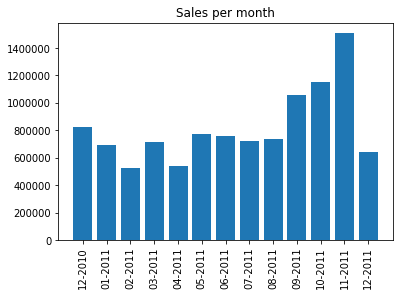

In [4]:
time_list = []
dict1 = {}
cancel_list = []
for i in s.transaction_timestamp:
    if i[3:10] in time_list:
        pass
    else:
        time_list.append(i[3:10])
        
for i in time_list:
    dict1[i] = 0.0
    
for i,j in enumerate(s.transaction_id):
    if j[0]=='C':
        cancel_list.append(i)

        
for i,j in enumerate(s.transaction_timestamp):
    if i in cancel_list or s.unit_price[i] == 'None' or s.quantity_sold[i]=='None':
        pass
    else:
        a=j[3:10]
        dict1[a] = dict1.get(a) +  (s.quantity_sold[i] * s.unit_price[i])
        
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(len(dict1)), list(dict1.values()))
plt.xticks(range(len(dict1)), list(dict1.keys()), rotation = 'vertical')
plt.title('Sales per month')

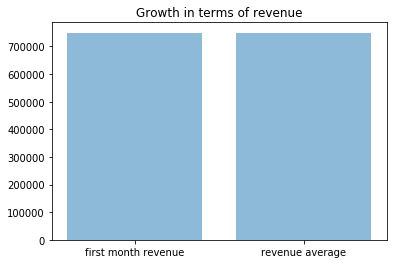

In [5]:
count=0
for i,j in enumerate(s.transaction_timestamp):
    
    if j[3:10] == '12-2010':
        count = count + s.unit_price[i] * s.quantity_sold[i]
    else:
        pass
    
count1 = 0
for i,j in enumerate(s.transaction_timestamp):
    count1 = count1+ s.unit_price[i] * s.quantity_sold[i]
    
count1/13

import numpy as np

objects = ('first month revenue','revenue average')
y_pos = np.arange(len(objects))
performance = [748957.0199999774,749826.7641540901]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.title('Growth in terms of revenue')

plt.show()

In [6]:
cid_dict = {}
for i,j in enumerate(s.customer_id):
    if j in cid_dict:
        if s.quantity_sold[i] == ' None' or s.unit_price[i] == 'None':
            pass
        else:
            cid_dict[j] = cid_dict[j] + (s.quantity_sold[i]*s.unit_price[i])
    else:
        cid_dict[j] = s.quantity_sold[i] * s.unit_price[i]
        
from collections import Counter 
k = Counter(cid_dict)
high = k.most_common(10)
for i in high: 
    print(i[0]," :",i[1]," ")

14646.0  : 279489.0199999999  
18102.0  : 256438.49000000005  
17450.0  : 187482.17000000013  
14911.0  : 132572.6199999998  
12415.0  : 123725.44999999987  
14156.0  : 113384.13999999985  
17511.0  : 88125.37999999996  
16684.0  : 65892.07999999999  
13694.0  : 62653.10000000003  
15311.0  : 59419.34000000011  


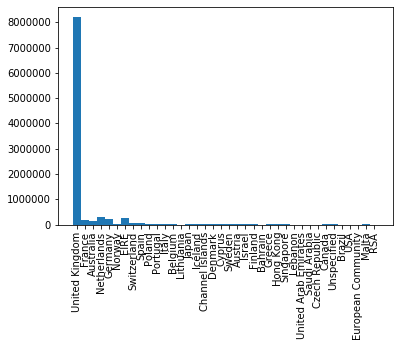

In [7]:
c_dict ={}
for i,j in enumerate(s.transaction_country):
    if j in c_dict:
        c_dict[j] = c_dict[j] + (s.unit_price[i] * s.quantity_sold[i])
    else:
        c_dict[j] = s.unit_price[i] * s.quantity_sold[i]
        
import matplotlib.pyplot as plt
plt.bar(range(len(c_dict)), list(c_dict.values()), width = 1)
plt.xticks(range(len(c_dict)), list(c_dict.keys()), rotation = 'vertical')


plt.show() 

In [8]:
c_dict = {}
for i,j in enumerate(s.transaction_country):
    if j in c_dict:
        c_dict[j] = c_dict[j]+1
    else:
        c_dict[j] = 1
        
total = 0
for i in c_dict:
    total = total+ c_dict[i]
    
for i in c_dict:
    
    print('{} = {}'.format(i,round(c_dict[i]/total*100,2)))

United Kingdom = 91.43
France = 1.58
Australia = 0.23
Netherlands = 0.44
Germany = 1.75
Norway = 0.2
EIRE = 1.51
Switzerland = 0.37
Spain = 0.47
Poland = 0.06
Portugal = 0.28
Italy = 0.15
Belgium = 0.38
Lithuania = 0.01
Japan = 0.07
Iceland = 0.03
Channel Islands = 0.14
Denmark = 0.07
Cyprus = 0.11
Sweden = 0.09
Austria = 0.07
Israel = 0.05
Finland = 0.13
Bahrain = 0.0
Greece = 0.03
Hong Kong = 0.05
Singapore = 0.04
Lebanon = 0.01
United Arab Emirates = 0.01
Saudi Arabia = 0.0
Czech Republic = 0.01
Canada = 0.03
Unspecified = 0.08
Brazil = 0.01
USA = 0.05
European Community = 0.01
Malta = 0.02
RSA = 0.01


In [9]:
pid_dict = {}
for i, j in enumerate(s.product_description):
    if j in pid_dict:
        pid_dict[j] = pid_dict[j] + s.quantity_sold[i]
    else:
        pid_dict[j] = s.quantity_sold[i]
        
pid_dict

{'WHITE HANGING HEART T-LIGHT HOLDER': 35317,
 'WHITE METAL LANTERN': 1841,
 'CREAM CUPID HEARTS COAT HANGER': 1974,
 'KNITTED UNION FLAG HOT WATER BOTTLE': 3309,
 'RED WOOLLY HOTTIE WHITE HEART.': 4698,
 'SET 7 BABUSHKA NESTING BOXES': 1666,
 'GLASS STAR FROSTED T-LIGHT HOLDER': 504,
 'HAND WARMER UNION JACK': 4841,
 'HAND WARMER RED POLKA DOT': 120,
 'ASSORTED COLOUR BIRD ORNAMENT': 36381,
 "POPPY'S PLAYHOUSE BEDROOM ": 2016,
 "POPPY'S PLAYHOUSE KITCHEN": 2108,
 'FELTCRAFT PRINCESS CHARLOTTE DOLL': 2375,
 'IVORY KNITTED MUG COSY ': 668,
 'BOX OF 6 ASSORTED COLOUR TEASPOONS': 557,
 'BOX OF VINTAGE JIGSAW BLOCKS ': 924,
 'BOX OF VINTAGE ALPHABET BLOCKS': 1329,
 'HOME BUILDING BLOCK WORD': 2760,
 'LOVE BUILDING BLOCK WORD': 2030,
 'RECIPE BOX WITH METAL HEART': 7,
 'DOORMAT NEW ENGLAND': 3826,
 'JAM MAKING SET WITH JARS': 8470,
 'RED COAT RACK PARIS FASHION': 348,
 'YELLOW COAT RACK PARIS FASHION': 281,
 'BLUE COAT RACK PARIS FASHION': 463,
 'BATH BUILDING BLOCK WORD': 821,
 'ALARM CLOC

In [10]:
from collections import Counter 
k = Counter(pid_dict)
high = k.most_common(10)
for i in high: 
    print(i[0]," :",i[1]," ")

WORLD WAR 2 GLIDERS ASSTD DESIGNS  : 53847  
JUMBO BAG RED RETROSPOT  : 47363  
ASSORTED COLOUR BIRD ORNAMENT  : 36381  
POPCORN HOLDER  : 36334  
PACK OF 72 RETROSPOT CAKE CASES  : 36039  
WHITE HANGING HEART T-LIGHT HOLDER  : 35317  
RABBIT NIGHT LIGHT  : 30680  
MINI PAINT SET VINTAGE   : 26437  
PACK OF 12 LONDON TISSUES   : 26315  
PACK OF 60 PINK PAISLEY CAKE CASES  : 24753  
